# Pazy wing static aeroelastic results

Available data sets include:
  * SHARPy (with and without skin). 
  
      Displacement in an inertial frame of reference aligned with the flow. No gravity, density=1.225 kg/m3, UVLM panel discretisation (16 chordwise panels, horseshoe wake). Spanwise discretisation the same elements as the original UM/NAST model. UVLM panel edges are coincident with nodes in the spanwise position.
      
      Column 1 contains the velocity and column 2 the vertical wing tip displacement at 44.1% of chord for the skin off case and 53.1% of chord for the skin on case.
      
  * Technion MRM (with and without skin) - based on UM model `mrm_umbeam_`
  
      Displacement in an inertial frame of reference aligned with the flow. No gravity, density=1.225kg/m3. Displacement measured at 50% of the chord
      
      Column 1 contains the velocity and column 2 the vertical wing tip displacement.
      
   * Technion MRM (with skin) - based on NASTRAN model `mrm_nastran_`
  
      Displacement in an inertial frame of reference aligned with the flow. No gravity, density=1.225kg/m3. Displacement measured at 50% of the chord
      
      Column 1 contains the velocity and column 2 the vertical wing tip displacement.
      
   * Technion MRM (with skin and trailing edge mass) - based on NASTRAN model `mrm_nastran_te1_`
  
      Displacement in an inertial frame of reference aligned with the flow. No gravity, density=1.225kg/m3. Displacement measured at 50% of the chord
      
      Column 1 contains the velocity and column 2 the vertical wing tip displacement.
      
  * Technion Experimental data set (skin on)
      
      Displacement in an inertial frame of reference aligned with the flow. Wing mounted vertically. Density=1.225kg/m3. Displacement measured at 50% of the chord.
      
      Column 1 contains the velocity, column 2 the vertical wing tip displacement in metres and column 3 contains the tolerance (equal for the plus and minus sides) in metres.
      
  * UM/NAST (with and without skin) (2D Aero + tip correction):
  
      Column 1 contains the velocity, columns 2 and 3 the vertical and axial displacements of the reference line and columns 4 and 5 the vertical/axial displacements of the wing-tip mid-chord position.
      
  * NASTRAN SOL400 + VLM (no skin only):
  
      Column 1 contains the velocity, columns 2 and 3 the vertical and axial displacements of the reference line and columns 4 and 5 the vertical/axial displacements of the wing-tip mid-chord position.
      
  * NASTRAN 144 (linear, skin and without skin):
  
      Column 1 contains the velocity, columns 2 and 3 the vertical and axial displacements of the reference line and columns 4 and 5 the vertical/axial displacements of the wing-tip mid-chord position. 
      
Version Control:
  * SHARPy version: v1.1.1-234-g37298ed-37298ed
  * Pazy wing model version: 5036cbd0fca0765d2602a9bec8442e1c83c82212
  * Test script version: 05268bd41ae72d080755903576acf5d5a6d09a55

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
results = {}
alpha = np.array([5, 7])

results['sharpy_w_skin'] = {'filename': 'sharpy_w_skin',
                            'skin': True,
                          'label': 'SHARPy',
                           'line_format': {'ls': '--', 
                                          'marker': 'o',
                                          'mfc': 'none'}}
results['sharpy_wo_skin'] = {'filename': 'sharpy_wo_skin',
                            'skin': False,
                          'label': 'SHARPy',
                           'line_format': {'ls': '--',
                                          'marker': 'o',
                                          'mfc': 'none'}}

results['mrm_wo_skin'] = {'filename': 'mrm_umbeam_wo_skin',
                            'skin': False,
                          'label': 'MRM UM Model',
                           'line_format': {'ls': '-',
                                           'marker': '^',
                                          'mfc': 'none'}}



results['mrm_w_skin'] = {'filename': 'mrm_umbeam_w_skin',
                            'skin': True,
                          'label': 'MRM UM Model',
                           'line_format': {'ls': '-',
                                           'marker': '^',
                                          'mfc': 'none'}}

results['mrm_nastran'] = {'filename': 'mrm_nastran',
                            'skin': True,
                          'label': 'MRM NASTRAN',
                           'line_format': {'ls': 'none',
                                           'marker': '2',
                                           }}


results['technion_experimental'] = {'filename': 'technion_experimental',
                            'skin': True,
                          'label': 'Experimental',
                           'line_format': {'ls': 'none'}}

results['umnast_w_skin'] = {'filename': 'UMNAST_w_skin',
                            'skin': True,
                            'label': 'UM/NAST',
                            'line_format': {'ls': '-.',
                                          'marker': 's',
                                          'mfc': 'none'}}

results['umnast_wo_skin'] = {'filename': 'UMNAST_wo_skin',
                            'skin': False,
                            'label': 'UM/NAST',
                            'line_format': {'ls': '-.',
                                          'marker': 's',
                                          'mfc': 'none'}}

results['nastran_wo_skin'] = {'filename': 'NASTRAN_wo_skin',
                            'skin': False,
                            'label': 'NASTRAN SOL400/VLM',
                            'line_format': {'ls': 'none',
                                            'marker': '*',
                                            'mfc': 'none'}}

results['nastran_lin_wo_skin'] = {'filename': 'NASTRAN_linear_wo_skin',
                                    'skin': False,
                                    'label': 'NASTRAN SOL144',
                                    'line_format': {'ls': 'none',
                                            'marker': '1',
                                            'mfc': 'none'}}
results['nastran_lin_w_skin'] = {'filename': 'NASTRAN_linear_w_skin',
                                    'skin': True,
                                    'label': 'NASTRAN SOL144',
                                    'line_format': {'ls': 'none',
                                            'marker': '1',
                                            'mfc': 'none'}}

In [3]:
for case in results.values():
    case['data'] = []
    for aoa in alpha:
        case['data'].append(np.loadtxt('./' + case['filename'] + '_alpha{:04g}.txt'.format(aoa * 100)))

In [4]:
rho = 1.225

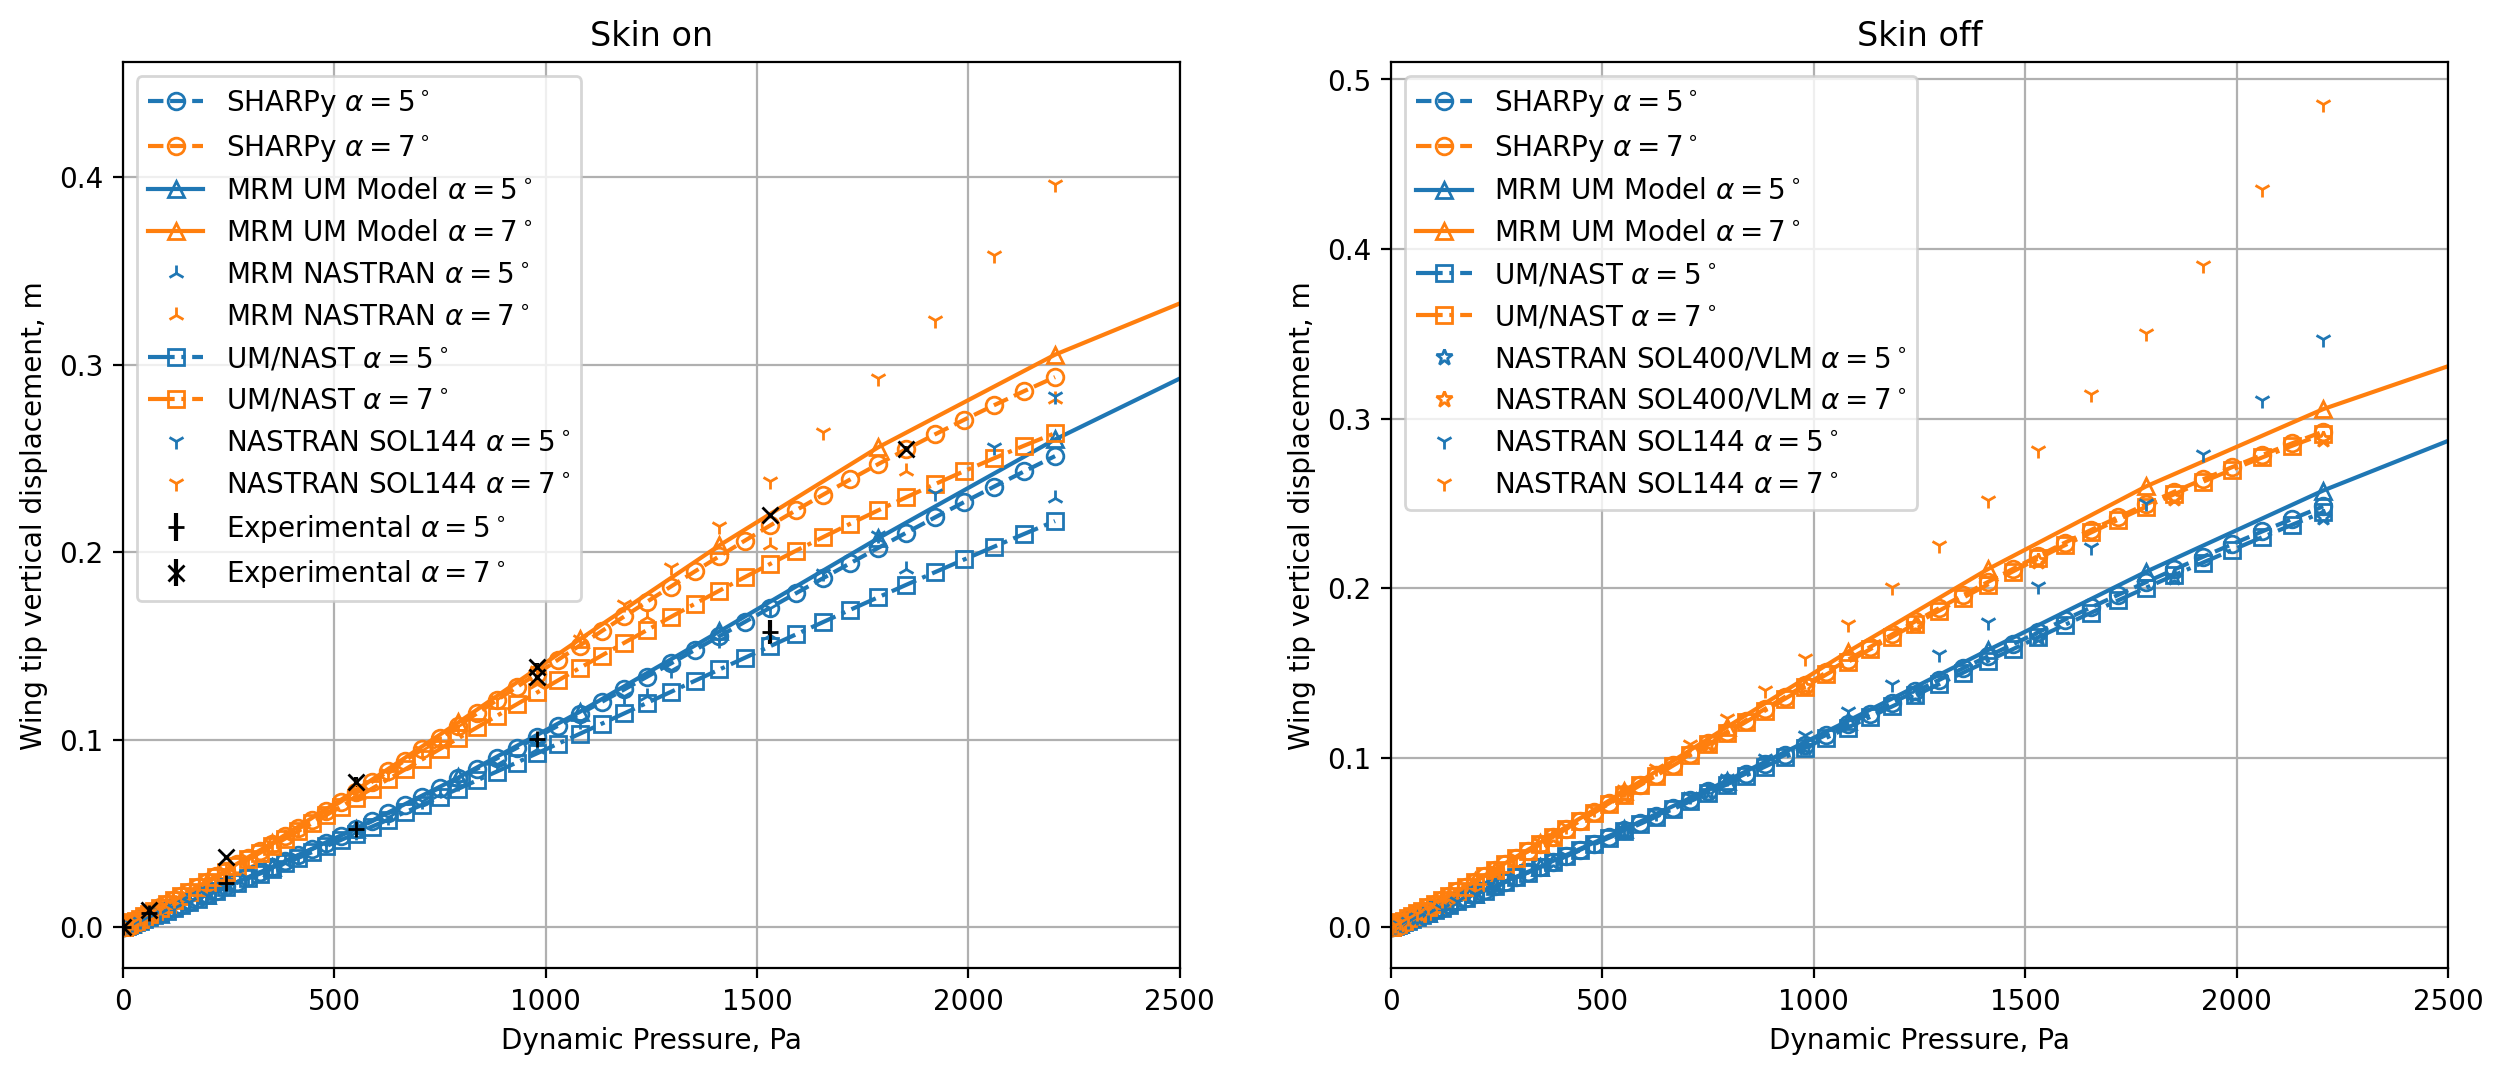

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6))

color_list = ['tab:blue', 'tab:orange', 'tab:red']
marker_list = ['+', 'x', 's']

for key, case in results.items():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]  
    
    for i_alpha in range(len(alpha)):
        if key == 'technion_experimental':
            a.errorbar(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1], yerr=case['data'][i_alpha][:, 2], fmt=marker_list[i_alpha], color='k',
                      label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),)
        elif 'umnast' in key:
            a.plot(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1], 
                   color=color_list[i_alpha],
                   label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),
                   **case.get('line_format', {}))
        else:
            a.plot(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1], 
                   color=color_list[i_alpha],
                   label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),
                   **case.get('line_format', {}))
    
for a in ax:
    a.legend()
#     a.set_xlim(0, 3.5)
#     a.set_ylim(-0.35, 0.05)
    a.set_xlabel('Dynamic Pressure, Pa')
    a.set_ylabel('Wing tip vertical displacement, m')
    a.grid()

ax[0].set_xlim(0, 2500)
ax[1].set_xlim(0, 2500)
ax[0].set_title('Skin on')
ax[1].set_title('Skin off');